# Task 2: Data Cleansing and Transformation

Instructions:
1. Acquire a real-world dataset requiring data cleaning and transformation.
2. Address data quality issues (missing values, inconsistent formats, outliers).
3. Develop a cleaning strategy (imputation, outlier detection, normalization).
4. Implement necessary transformation steps (feature engineering, aggregation).
5. Validate the cleaned and transformed dataset for integrity and usability.
6. Document the steps taken and provide clear explanations.
7. Present the cleaned and transformed dataset for further analysis.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("Datasets/california_housing/housing.csv")

<font color=red>1. Acquired Real-world dataset</font>
### Dataset details
- Description: The dataset is California Housing Prices dataset. <br>
- Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]

In [3]:
# data.head()
data.info()
# data['longitude'].isnull().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Only one categorical data Ocean_Proximity

In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

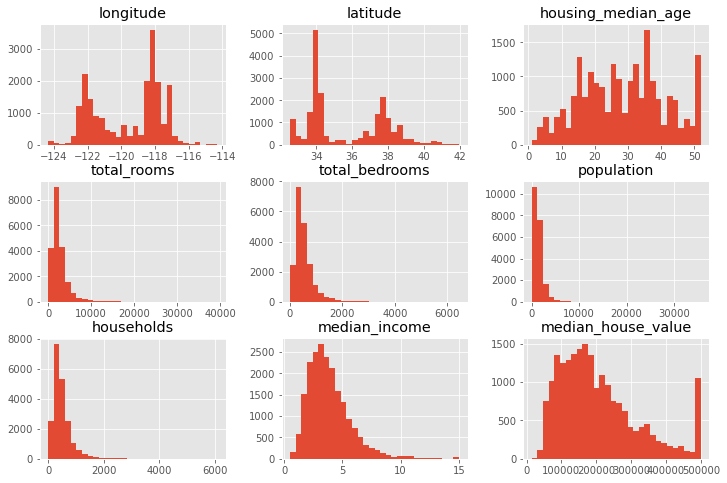

In [6]:
data.hist(bins=30,figsize=(12,8))

<font color=red>2. Data quality and 3. Data cleaning</font>
##### Pre-processing
- For this task, the data in not normally distributed. Using Stratified sampling technique to prepare the test dataset.
- Creating a new feature income_label which is income category and used if for sampling.

In [8]:
data['income_label']=np.ceil(data['median_income']/1.5)
data['income_label'].where(data['income_label']<5,5.0,inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(data,data['income_label']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [12]:
strat_train_set.drop('income_label',axis=1,inplace=True)
strat_test_set.drop('income_label',axis=1,inplace=True)
strat_train_set.to_csv("Datasets/california_housing/strat_train_set.csv",index=False)
strat_test_set.to_csv("Datasets/california_housing/strat_test_set.csv",index=False)

In [14]:
data=pd.read_csv('Datasets/california_housing/strat_train_set.csv')
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


##### EDA
- Carrying out various visualization on train dataset for realising patterns, correlations and getting the sense of the data

Text(0.5, 1.0, 'Distribution of households')

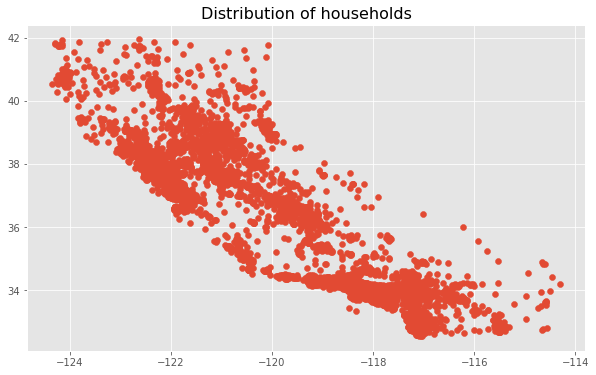

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

C:\Users\MAHAVIR\AppData\Local\Temp\ipykernel_23508\1422664156.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


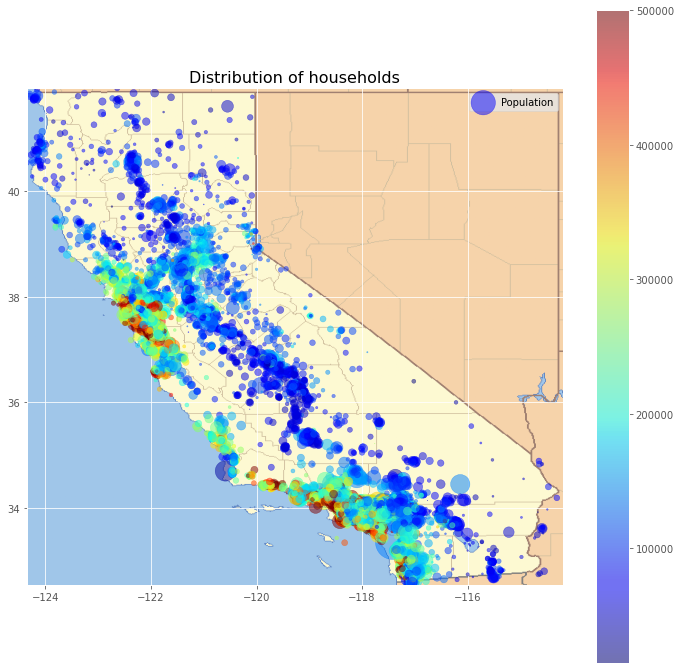

In [16]:
plt.figure(figsize=(12,12))
img=plt.imread('Datasets/california_housing/california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

##### Inights from Visualization
- Housing prices are much related to location and population density.
- Housing prices near ocean are higher except in northern california.
- Now, see the correlation of 'medial house value' with other columns. This is Pearson's correlation coefficient.

In [17]:
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

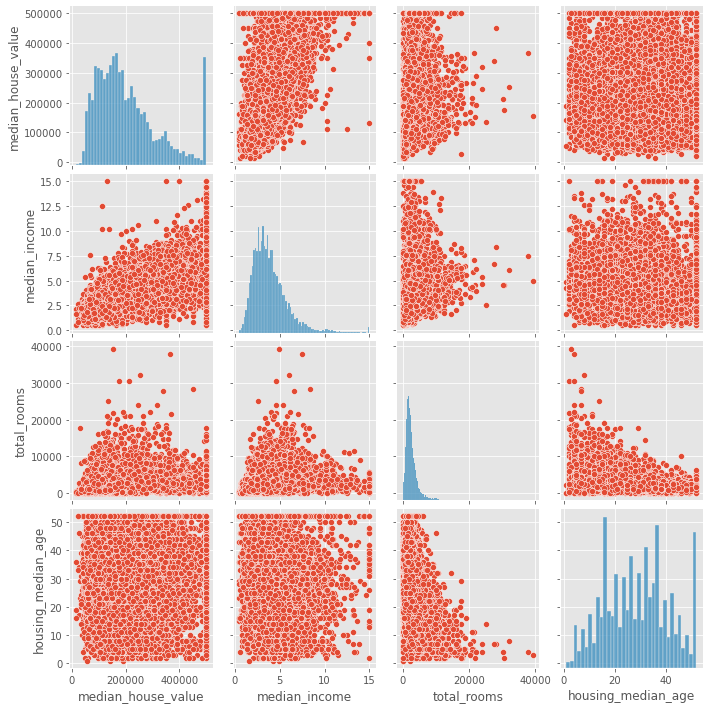

In [18]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

- Median Income is the most promising attribute to get Median Hosung Price

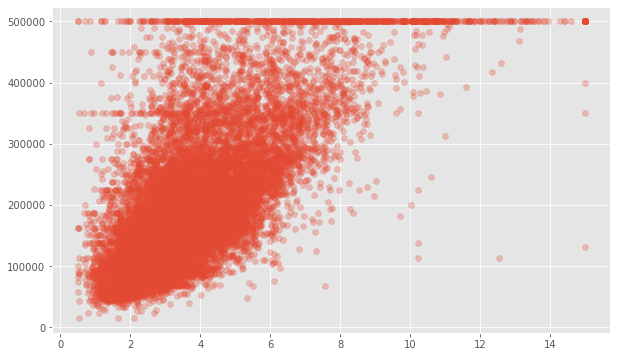

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

- A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.

<font color=red>4. Feature Engineering</font>
##### Creating new features:
- rooms per household
- bedrooms per room
- population per household

In [21]:
data_copy = data.copy()

In [23]:
data_copy['rooms_per_household']=data_copy['total_rooms']/data_copy['households']
data_copy['bedrooms_per_room']=data_copy['total_bedrooms']/data_copy['total_rooms']
data_copy['population_per_household']=data_copy['population']/data_copy['households']
# data_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [24]:
corr_matrix=data_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<font color=red>5. Validation of new features and data</font>
- It is clear that rooms_per_household and bedrooms_per_room have better correlation with median_house_value than total_rooms and total_bedrooms.
- Later Feature adder class needs to be created later during testing.(tranforming the data to have new features)

In [35]:
data.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              16354
                                                      True            False       False       False          False               False                158
dtype: int64

array([[<AxesSubplot:title={'center':'bedrooms_per_room'}>]], dtype=object)

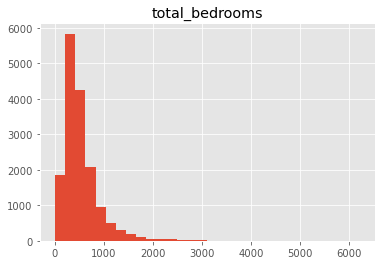

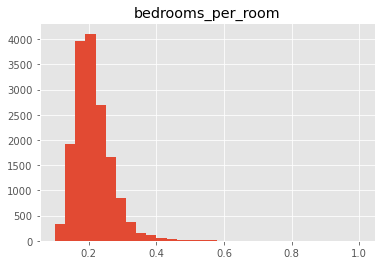

In [36]:
data_copy.hist(column='total_bedrooms',bins=30)
data_copy.hist(column='bedrooms_per_room',bins=30)

##### Cleaning the data
- Removing Outliers realised through boxplots

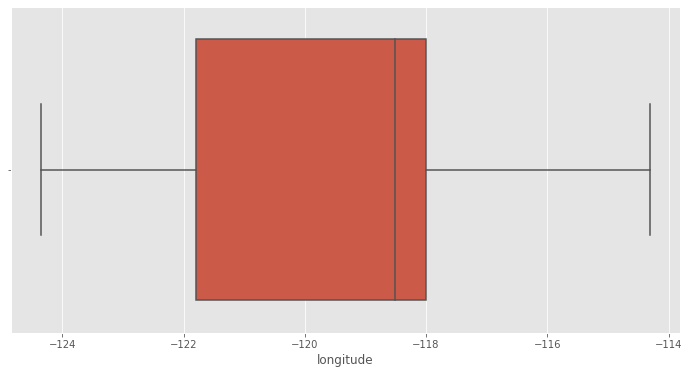

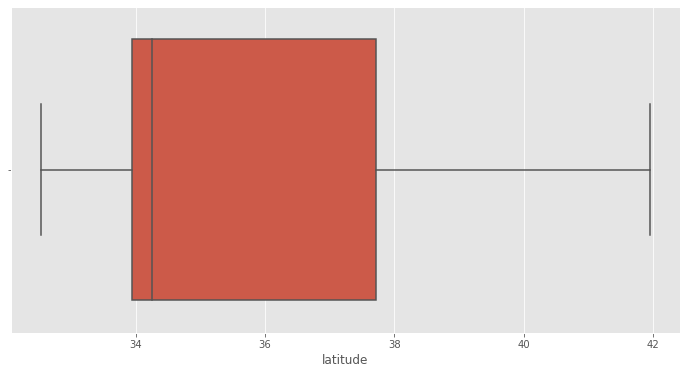

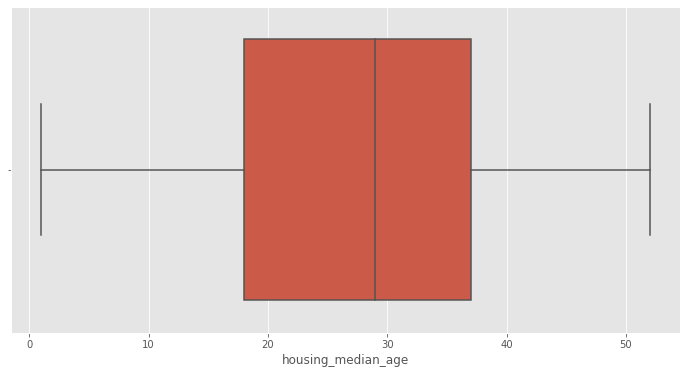

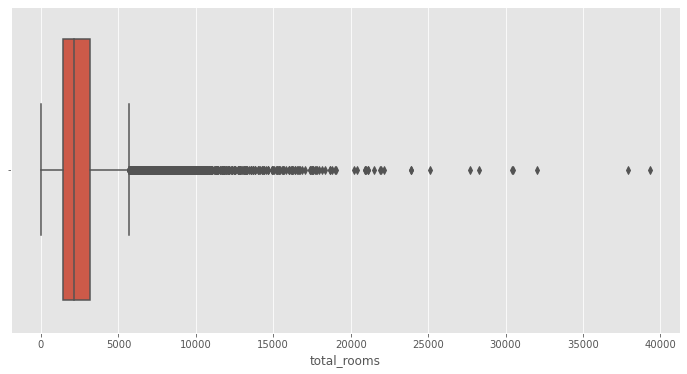

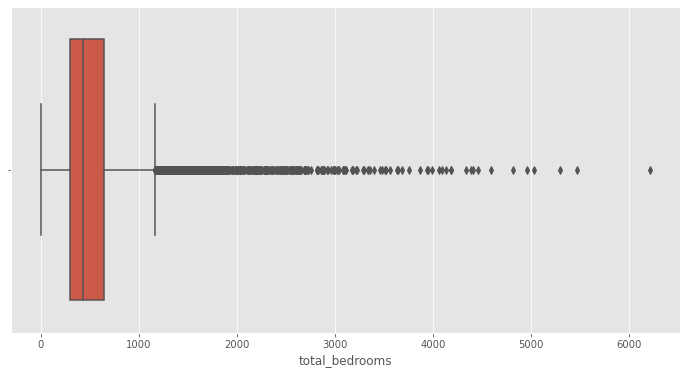

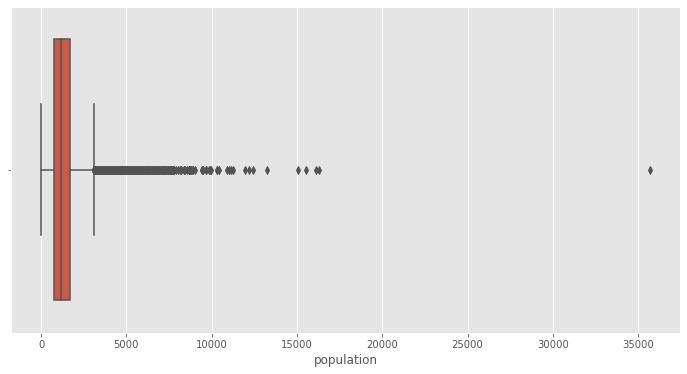

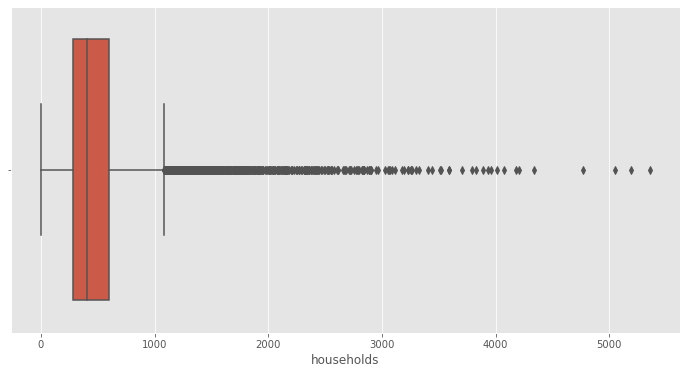

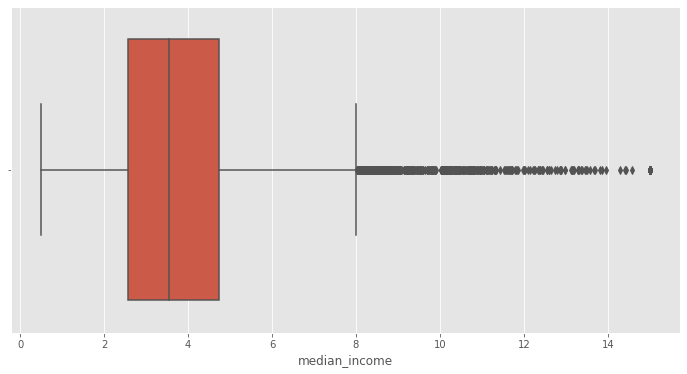

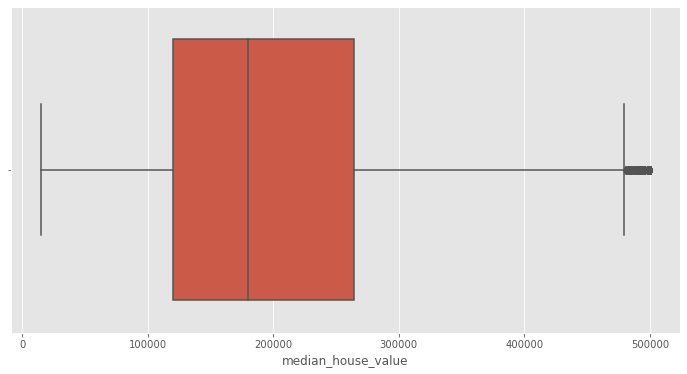

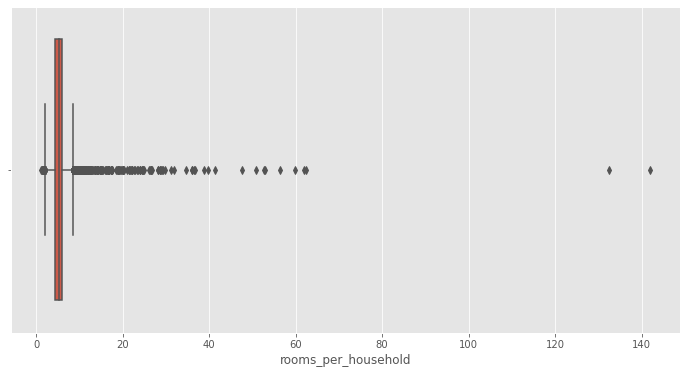

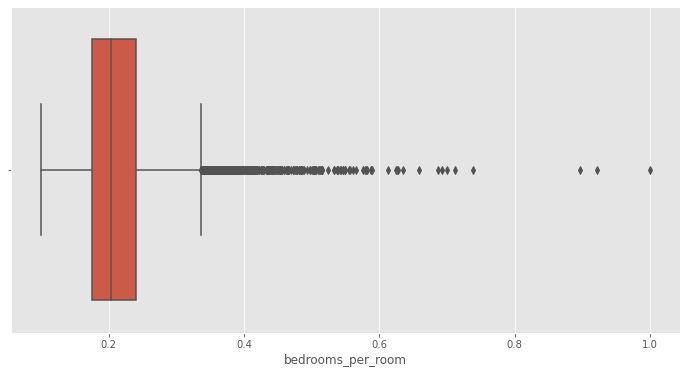

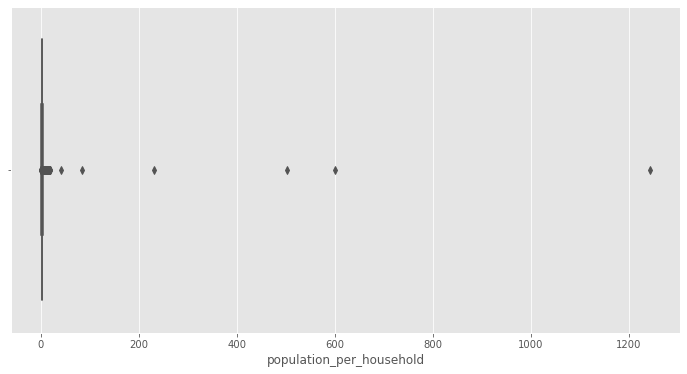

In [38]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data_copy,ax=ax)

In [39]:
from sklearn.base import BaseEstimator,TransformerMixin

class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

data_copy=RemoveOutliers().fit_transform(data_copy)

data_labels=data_copy['median_house_value']
data_copy=data_copy.drop('median_house_value',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16005 entries, 0 to 16004
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16005 non-null  float64
 1   latitude                  16005 non-null  float64
 2   housing_median_age        16005 non-null  float64
 3   total_rooms               16005 non-null  float64
 4   total_bedrooms            16005 non-null  float64
 5   population                16005 non-null  float64
 6   households                16005 non-null  float64
 7   median_income             16005 non-null  float64
 8   ocean_proximity           16005 non-null  object 
 9   rooms_per_household       16005 non-null  float64
 10  bedrooms_per_room         16005 non-null  float64
 11  population_per_household  16005 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.5+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:>]], dtype=object)

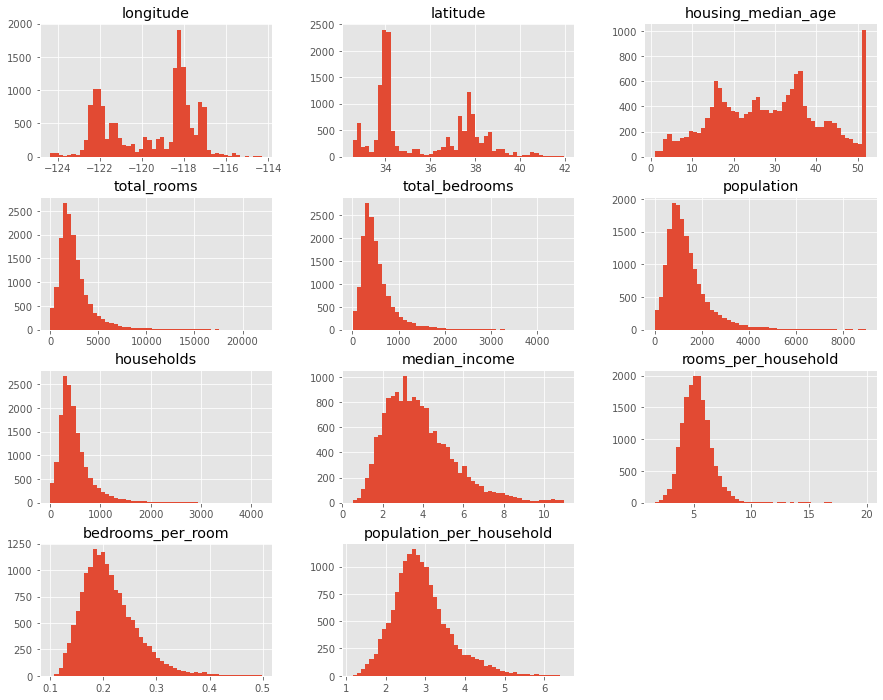

In [43]:
# data_copy.head()
# data_copy.isnull().value_counts()
data_copy.info()
data_copy.hist(bins=50,figsize=(15,12))

<font color=red>6. Summary of steps taken</font>
##### Steps undertaken for pre-processing the data:
- Data has been cleaned with no null values and outliers. 
- We have further converted the categorical feature to numeric and scaled the data.
##### Further Analysis steps to be done:
- Remove skewness
- Can also use Get dummies to convert categorical feature of 'ocean_proximity'
- Check for Multi colinearity and scale the features further.